# Sistemas Inteligentes

## Laboratório 3 - Redução de Dimensionalidade e Regressão

Algoritmos de Redução de dimensionalidade:
- Principal Component Analysis (PCA)
- Independent Component Analysis (ICA)
- Isometric Mapping (Isomap)
- T-Distributed Stochastic Neighbor Embedding (TSNE)

Modelos de regressão linear:
- Least Squares
- Ridge
- Lasso
- Lasso Least-angle regression (LARS)
- RANdom SAmple Consensus (RANSAC)
- Theil-Sen

## Importação e preparação dos dados

Importe o dataset de pacientes diabéticos da biblioteca Scikit (load_diabetes) e separe os dados entre atributos (X) e saídas (y).

In [ ]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
x = diabetes.data
y = diabetes.target

Mostre os formatos da variável de atributos e da variável de saídas.

In [ ]:
x.shape

(442, 10)

In [ ]:
y.shape

(442,)

## Redução de Dimensionalidade

Importe e aplique as funções de redução de dimensionalidade (PCA, FastICA, Isomap e TSNE) para reduzir a dimensionalidade a apenas uma feature.

In [ ]:
from sklearn.manifold import Isomap, TSNE
from sklearn.decomposition import FastICA, PCA

x_isomap = Isomap(n_components=1).fit_transform(x)
x_tsne = TSNE(n_components=1).fit_transform(x)
x_fastica = FastICA(n_components=1).fit_transform(x) 
x_pca = PCA(n_components=1).fit_transform(x)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Mostre o formato da nova variável de atributos após a redução de dimensionalidade para cada algoritmo.

In [ ]:
x_isomap.shape

(442, 1)

In [ ]:
x_tsne.shape

(442, 1)

In [ ]:
x_fastica.shape

(442, 1)

In [ ]:
x_pca.shape

(442, 1)

### Caso mais simples

Faça a separação dos dados para treinamento e teste. Reserve 20% dos dados para teste.

In [ ]:
from sklearn.model_selection import train_test_split

x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, y, test_size=0.20)

Importe o regressor linear e utilize-o para gerar um modelo, então faça uma regressão com os dados de teste.

In [ ]:
from sklearn.linear_model import LinearRegression

reg_pca = LinearRegression().fit(x_train_pca, y_train_pca)
y_reg_predict_pca = reg_pca.predict(x_test_pca)

Importe as funções de erro quadrático médio (MSE) e o coeficiente de determinação (R²), então imprima o MSE e o R².

In [ ]:
from sklearn.metrics import mean_squared_error as msqe
from sklearn.metrics import r2_score as r2

print('Erro Quadrático Médio: %.2f' % msqe(y_test_pca, y_reg_predict_pca))
print('Coeficiente de Determinação: %.2f' % r2(y_test_pca, y_reg_predict_pca))

Erro Quadrático Médio: 4322.18
Coeficiente de Determinação: 0.31


Então exiba o gráfico de dispersão dos dados de teste e a curva de regressão gerada.

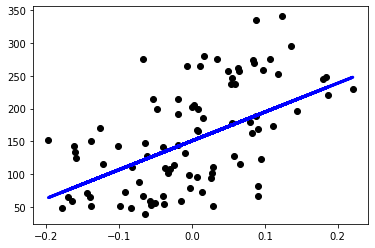

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x_test_pca, y_test_pca, color = 'black')
plt.plot(x_test_pca, y_reg_predict_pca, color = 'blue', linewidth=3)

### Comparando Métodos de Redução de Dimensionalidade

Agora, a fim de comparar com outras técnicas, crie um método iterativo que realize as etapas de separação dos dados entre treinamento e teste, gere um modelo de regressão linear, faça a predição com base nos dados de testes e calcule o erro quadrático médio e o coeficiente de determinação para cada iteração. Então, calcule os valores mínimo, médio, máximo e desvio padrão para cada uma dessas duas métricas. Por fim, plote os histogramas (com 100 bins) das duas métricas. Use 10000 (dez mil) iterações.

In [ ]:
import numpy as np

def pipeline_reducao(x_reduzido, y_entrada, metodo):
  mse = []
  r2s = []

  for i in range(10000):
    x_train, x_test, y_train, y_test = train_test_split(x_reduzido, y_entrada, test_size=0.2, shuffle=True)
    reg_lin = LinearRegression().fit(x_train, y_train)
    y_pred = reg_lin.predict(x_test)
    mse.append(msqe(y_test, y_pred))
    r2s.append(r2(y_test, y_pred))

  print(f"------------{metodo}------------")
  print(f"-----mse-----")
  print(f"min: {np.min(mse):.2f}")
  print(f"media: {np.mean(mse):.2f}")
  print(f"max: {np.max(mse):.2f}")
  print(f"desv: {np.std(mse):.2f}")
  print(f"-----r2-----")
  print(f"min: {np.min(r2s):.2f}")
  print(f"media: {np.mean(r2s):.2f}")
  print(f"max: {np.max(r2s):.2f}")
  print(f"desv: {np.std(r2s):.2f}")

  plt.figure()
  plt.subplot(211)
  n, bins, patches = plt.hist(mse, bins=100, color='blue', alpha=0.85)
  plt.subplot(212)
  n, bins, patches = plt.hist(r2s, bins=100, color='red', alpha=0.85)
  plt.subplot(212)

#### PCA

------------PCA------------
-----mse-----
min: 2560.93
media: 4150.22
max: 6391.32
desv: 480.05
-----r2-----
min: -0.09
media: 0.29
max: 0.51
desv: 0.07


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


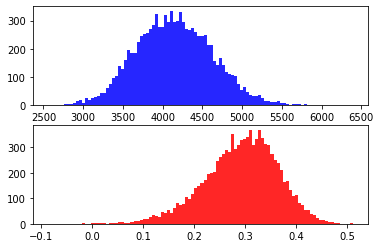

In [ ]:
pipeline_reducao(x_pca, y, "PCA")

#### ICA

------------ICA------------
-----mse-----
min: 2625.09
media: 4136.29
max: 5996.36
desv: 477.80
-----r2-----
min: -0.11
media: 0.29
max: 0.51
desv: 0.07


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


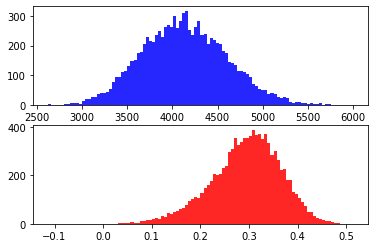

In [ ]:
pipeline_reducao(x_fastica, y, "ICA")

#### Isomap

------------Isomap------------
-----mse-----
min: 3758.36
media: 5618.72
max: 8204.11
desv: 584.24
-----r2-----
min: -0.25
media: 0.04
max: 0.17
desv: 0.05


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


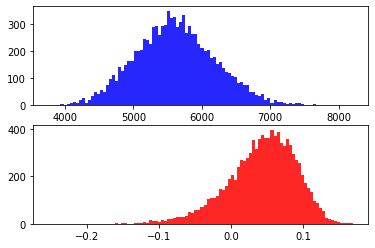

In [ ]:
pipeline_reducao(x_isomap, y, "Isomap")

#### TSNE

------------TSNE------------
-----mse-----
min: 3105.42
media: 4953.99
max: 7361.12
desv: 552.06
-----r2-----
min: -0.17
media: 0.15
max: 0.35
desv: 0.07


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


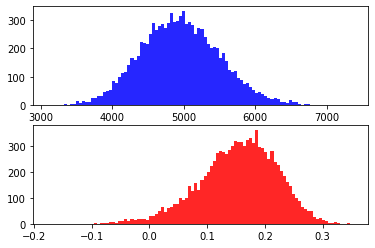

In [ ]:
pipeline_reducao(x_tsne, y, "TSNE")

### Comparando modelos de Regressão

Exiba o gráfico de dispersão dos dados de teste e a curva de regressão gerada em cada caso.

Aqui usaremos como dataset base para o treinamento dos modelos o dataset com PCA, para tentar dar continuidade aos testes iniciados na primeira parte deste notebook.

In [ ]:
# Importando cada modelo
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor

In [ ]:
# Criando um dicionário de modelos para facilitar chamadas do pipeline
dic_modelos = {
    "linear_regression": LinearRegression(),
    "lasso": Lasso(),
    "ridge": Ridge(),
    #"lasso_lars": LassoLars(),
    "bayesian_ridge": BayesianRidge(),
    "ransac": RANSACRegressor(),
    "theil_sen": TheilSenRegressor()
}

In [ ]:
# Função pipeline para evitar repetição de código
def pipeline_regressao(modelo_nome):
  x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.20)
  reg = dic_modelos[modelo_nome].fit(x_train, y_train)
  y_reg_predict = reg.predict(x_test)
  plt.scatter(x_test, y_test, color = 'black')
  plt.plot(x_test_pca, y_reg_predict_pca, color = 'blue', linewidth=3)

#### Least Squares

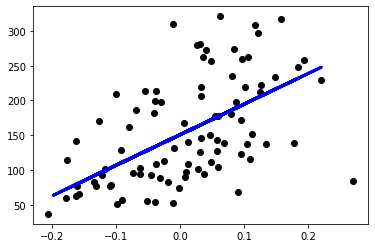

In [ ]:
pipeline_regressao("linear_regression")

#### Ridge

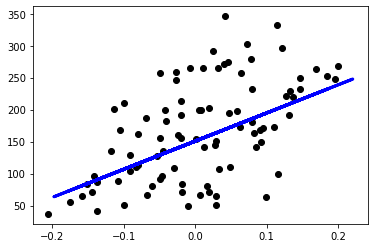

In [ ]:
pipeline_regressao("lasso")

#### Lasso

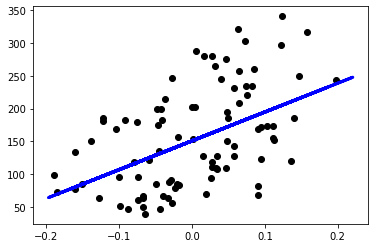

In [ ]:
pipeline_regressao("ridge")

#### Lasso LARS

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


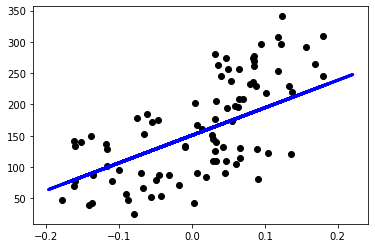

In [ ]:
pipeline_regressao("lasso_lars")

#### Bayesian Ridge

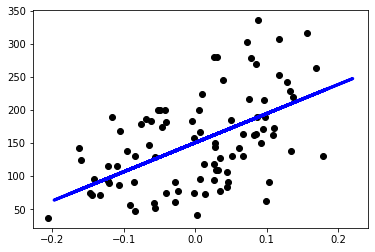

In [ ]:
pipeline_regressao("bayesian_ridge")

#### RANSAC

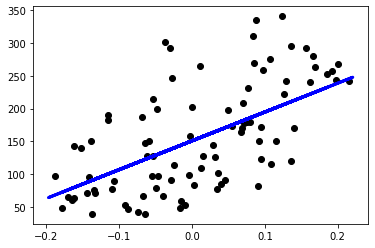

In [ ]:
pipeline_regressao("ransac")

#### Theil-Sen

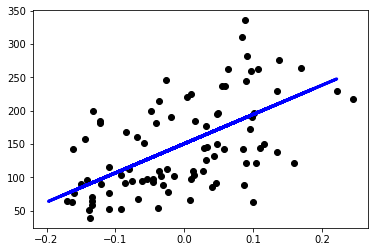

In [ ]:
pipeline_regressao("theil_sen")

### Gráfico geral comparativo

Em uma mesma figura, plote novamente o gráfico de dispersão e mais cada uma das curvas geradas utilizando cada técnica deste laboratório. Atente-se a fazer com que o gráfico seja suficientemente autoexplicativo, então utilize diferentes cores, insira uma legenda etc.

In [ ]:
# Recriando a função de pipeline para que ela itere por todos os modelos
import random
def pipeline_regressao_geral():
  x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.20)
  plt.scatter(x_test, y_test, color = 'black')
  for modelo in dic_modelos:
    reg = dic_modelos[modelo].fit(x_train, y_train)
    y_reg_predict = reg.predict(x_test)
    # Gerando vetor de cores aleatório
    cor = "#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)])
    plt.plot(x_test, y_reg_predict, color = cor, linewidth=3)
    plt.legend(dic_modelos.keys())

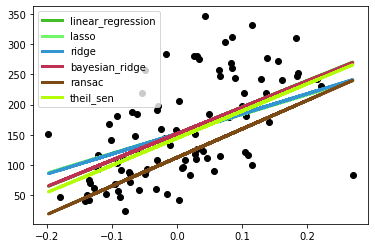

In [ ]:
pipeline_regressao_geral()